# COMP-2704: Supervised Machine Learning
### <span style="color:blue"> Week 7 </span>

<img src='cartoon5.png' />

## <span style="color:blue"> Chapter 5 </span>
### Using lines to split our points: The perceptron algorithm

The course will now focus on **classification** use cases.
* The label in a classification problem is categorical; each category is a class.
* For example, predicting whether an email is spam or ham is a classification problem.
* When there are only two possible classes, such as spam or ham, this is a *binary* classification problem.
* When there are more than two classes, the problem is called *multiclass*.

The use case will be on sentiment analysis.
* This is an area of natural language processing (NLP).
* We will see how to turn text into vectors so that it can be used as input for machine learning.
* The examples we begin with are simple and pedagogical.

We will use perceptrons for this problem.
* These are the building blocks of neural networks.
* We will create the code on our own before using the Turi Create package.

### The problem: We are on an alien planet, and we don’t know their language!

<img src='aliens.jpg' width='300'/>

*Generated by AI*

* We are on a planet where the alien language has two words: 'aack' and 'beep'.
* We can tell from the expression on their face when an alien is happy or sad.
* We want to build a binary classification model that can input an alien sentence and output a prediction of whether the alien is happy or sad.
* We gather some data:
    * Alien 1
        * Mood: Happy
        * Sentence: “Aack, aack, aack!”
    * Alien 2:
        * Mood: Sad
        * Sentence: “Beep beep!”
    * Alien 3:
        * Mood: Happy
        * Sentence: “Aack beep aack!”
    * Alien 4:
        * Mood: Sad
        * Sentence: “Aack beep beep beep!”
        
**<span style="color:green">Q: How can we convert this information into numerical data?</span>**

* One way is to count the frequencies of 'aack' and 'beep' in each sentence.
* Note that the order and context is important for NLP as well. More advanced models (presented in later courses) can take this information into account as well.

<img src='table5.1.png' width='600'/>

**<span style="color:green">Q: What rule could you formulate to predict the mood?</span>**

Perhaps something like:
* $z = x_{aack} - x_{beep}$
* if $z >= 0$ predict happy
* if $z < 0$ predict sad

You may have come up with similar ideas, but expressed differently. Writing at as above is pseudocode for how the rule is actually implemented.

Now that we have numerical data, we can make a plot. In the figure below  
* the $x$-axis represents the 'aack' frequency
* the $y$-axis represents the 'beep' frequency
* the colour represents the label: green for happy and red for sad

<img src='Fig5.2.png' width='400'/>

If we draw the line $z = 0$, i.e. $x_{beep} = x_{aack}$:
* We see that the points above the line are labeled sad, and points below the line are labeled happy.
* Also notice points above the line have $z < 0$ and points above the line have $z > 0$.
* This visual interpretation agrees with our rule above.
* Every point needs to be classified. If a point happens to fall on the line, our rule says to predict happy.

<img src='Fig5.3.png' width='400'/>

The line we found, along with the rule for which class is above (or on) the line and which is below, is a perceptron model.
* Training involves finding an equation for the line.
* It is different than linear regression, where the $y$-axis represented numerical labels. Here, the $y$-axis represents a feature, and the label is represented by colour.
* With more features, the equation represents a surface that is one dimension lower than the number of features. e.g. with three features, the points are in a 3d space and the perceptron is a 2d plane.

<img src='Fig5.10.png' width='500'/>

### A slightly more complicated planet

Consider a new planet where the words are now 'crack' and 'doink'. We record the following samples of data:

<img src='table5.2.png' width='600'/>

**<span style="color:green">Q: What rule could you formulate to predict the mood this time?</span>**

Perhaps something like:
* $z = x_{crack} + x_{doink} + 3.5$
* if $z >= 0$ predict happy
* if $z < 0$ predict sad

Again, you may have come up with similar ideas and other choices of bias (the $3.5$). For a simple dataset such as this, there is more than one line that can separate the points. Let's have a look at the plot.

<img src='Fig5.5.png' width='500'/>

### Does our classifier need to be correct all the time? No

* Our datasets so far have been small, and created in a way so that it is perfectly separable by a line.
* Realistically, datasets are much bigger, and it is not possible to separate the two classes perfectly with a surface.

<img src='Fig5.6.png' width='500'/>

### A more general classifier and a slightly different way to define lines

* You may be used to lines in the form $y = f(x)$ or $y = mx + b$, where the value of $y$ is an output for the $x$-value that is input.
* In these examples, it is more appropriate to name the variables $x_1$ and $x_2$ since they are both features; the output is a prediction of happy or sad (colour). 
* We write the equation of the line as $w_1 x_1 + w_2 x_2 + b = 0$, where $(w_1, w_2)$ and $b$ are the weights and bias.

**<span style="color:green">Q: What are the weights and bias for the two models we found in the above examples?</span>**

* In order to make the labels numerical, we choose $1$ to represent happy and $0$ to represent sad.
* To make a prediction, we calculate $z = w_1 x_1 + w_2 x_2 + b$.
* Then depending on whether $z \ge 0$ or $z < 0$, we predict $1$ or $0$ respectively. In code, this is done using the *step* function.

### The step function and activation functions: A condensed way to get predictions

* The step function is our first example of an *activation* function.
* It is often denoted as $\Theta$
* An activation function inputs a number and outputs a generally different number.
* The function is designed to give a particular relationship between the input and output.
* For the perceptron, we want to output a $0$ or $1$, depending on whether the input $z \in (-\infty, \infty)$ is positive, negative, or zero.
* Let's code this and make a plot to see what it looks like.

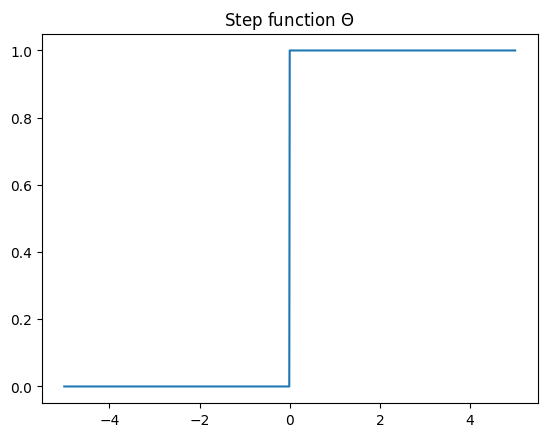

In [1]:
# define the function

def step(z):
    # start with output = 1 and change it to zero if z < 0
    output = 1
    if z < 0:
        output = 0
    return output

import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-5, 5, 1001)
y = np.zeros(len(x))
for i in range(len(x)):
    y[i] = step( x[i] )

plt.plot(x,y)
plt.title('Step function $\Theta$')
plt.show()

### What happens if I have more than two words? General definition of the perceptron classifier

* In realistic NLP, we have more words to deal with.
* Realistically, there are other considerations such as capitalization, spelling mistakes, and meaningless words (a.k.a. stopwords) to be considered. We will discuss these things in the next chapter.
* We can choose a vocabulary of $N$ words to look for.
* In each sample of data we find the count $x_i$ of each word $i$ in the vocabulary.
* There is a weight $w_i$ for each word $i$, and a bias $b$.

<img src='weights.png' width='200'/>

* Using vector notation, we calculate $z = \mathbf{w} \cdot \mathbf{x} + b$.
* (In fact, you can say $x_0 = 1$, and name the bias $w_0$, then write simply $z = \mathbf{w} \cdot \mathbf{x}$, but we'll do it the other way to keep things simple.)
* We then use the step funciton to get our prediction $$\Theta(z) = \left\{\begin{array}{l}
1, z \ge 0 \newline
0, z < 0
\end{array}\right.$$

When there are no counts for any of the words in the vocabulary, $x_i = 0$ for all $i$, and the bias completely determines the prediction.
* For movie reviews, you might expect a positive bias if you think a blank review is probably positive.
* For a conversation with a friend, you might expect a negative bias if you think a blank response is probably negative.

### How do we determine whether a classifier is good or bad? The error function

* As with all supervised learning models, we need an error function to optimize during training.

**<span style="color:green">Q: Do you have any ideas for possible error functions?</span>**

*Idea 1*:
* Count the number of errors.

<img src='Fig5.13.png' width='500'/>

* Problem: adjusting the parameters often leads to no change in error. This makes it difficult to determine how to lower the error.

<img src='Fig5.15.png' width='500'/>

*Idea 2*: 
* Find the average distance between the dividing surface and miscalculated points.
* Badly misclassified points have larger error than ones that are close to the line.

<img src='Fig5.16.png' width='500'/>

* Problem: distance is slow to calculate computationally.

*Idea 3* (what is actually done):
* Find the average absolute $z$-value (score) of misclassified points.
* The absolute value of score gets larger the further a misclassified point is from the line.
* The score is zero for points on the line.
* Problem: does not factor in correctly classified points; we will revisit this next chapter.

Here is an example of how to calculate perceptron error. Consider the following two percptron models, using the same data:
* Classifier 1: $z = x_{aack} + 2x_{beep} - 4$
* Classifier 2: $z = -x_{aack} + x_{beep}$

The image below shows plots of classifier 1 (on the left) and classifier 2 (on the right) along with the data.
<img src='Fig5.18.png' width='600'/>

We see that clasifier 2 is better. This is reflected in the error:

<img src='table5.4.png' width='600'/>

<span style="color:red">*Let's work through the above example together.*</span>